# Reading Phantom HDF5 dumps

Here we read in a collection of Phantom HDF5 dump files.

In [1]:
from plonk.plonk.dump import Dump

Read the dump files into a list. Each element of the list is a Plonk Dump object.

In [2]:
dump_file_names = ['data/disc_00000.h5']

dumps = list()

for dump_file_name in dump_file_names:
    dump = Dump(dump_file_name)
    dumps.append(dump)

We can access the dump parameters, i.e. the Phantom header. This is a dictionary with keys given by the Phantom header. For example we can access `hfact`, `alpha`, etc.

In [3]:
hfact = dumps[0].parameters["hfact"]
alpha = dumps[0].parameters["alpha"]

print(f'hfact = {hfact:.1f}')
print(f'alpha = {alpha:.3f}')

hfact = 1.0
alpha = 0.236


There is also a dictionary for units where the value is the value of the code units in cgs units.

In [4]:
for key in dumps[0].units:
    print(f'{key:20} {dumps[0].units[key]}')

distance             14960000000000.0
mass                 1.9891e+33
time                 5022728.790082334
frequency            1.9909496247827625e-07
velocity             2978460.6386750126
momentum             5.924456056388467e+39
force                1.1795293562508584e+33
pressure             5270424.14464802
energy               1.1795293562508584e+33
density              5.94103125029151e-07
surface_density      8887782.7504361
angular_momentum     8.862986260357147e+52
torque               1.7645759169512842e+46


The particle data is stored as a Pandas dataframe. Every particle has an `itype`, positions (as `x`, `y`, `z`), mass, smoothing length, and density (computed from the smoothing length), as well as any other quantities stored in the dump file, such as velocity (as `vx`, `vy`, `vz`), dust fraction, and so on. For example, the following shows the first 5 particles of the first dump file.

In [5]:
dumps[0].particles.iloc[:5]

,itype,x,y,z,h,m,rho,pressure,vx,vy,vz,dustfrac,divv,dt
0,1,-31.269099,-35.027568,-11.247553,1.629258,1.000000e-07,2.312227e-08,8.319090e-12,0.106367,-0.095378,0.0,0.002055,0.001085,9.017928
1,1,18.982811,130.934768,23.591143,2.426354,1.000000e-07,7.000633e-09,1.509708e-12,-0.082555,0.011762,0.0,0.001227,0.000152,18.035856
2,1,109.807836,-48.332495,3.099149,2.261923,1.000000e-07,8.641047e-09,1.971924e-12,0.035373,0.080244,0.0,0.010808,-0.000184,18.035856
3,1,-87.225447,-35.186138,-4.220097,1.752120,1.000000e-07,1.859126e-08,4.790044e-12,0.037253,-0.092721,0.0,0.006507,-0.000011,18.035856
4,1,-83.974547,4.328364,4.179969,1.609641,1.000000e-07,2.397799e-08,6.533154e-12,-0.005529,-0.105704,0.0,0.014254,-0.000158,18.035856


Similarly we have access to the sink particle data stored as a Pandas dataframe.

In [6]:
dumps[0].sinks

,x,y,z,m,h,hsoft,macc,spinx,spiny,spinz,tlast,vx,vy,vz
0,-3.827373e-15,-4.042294e-14,-8.654111e-15,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.529900e-17,-8.085516e-17,0.0


# Analyzing Phantom data

We can perform analysis on Phantom data. Currently available is a function `disc_analysis` which is equivalent to the Phantom analysis module in `analysis_disc.f90`.

In [7]:
from plonk.plonk.analysis.disc import disc_analysis

This analysis assumes a single disc around a single star (represented as a sink particle). We need to define the number of radial bins to average our data, as well as the inner and outer disc radius.

In [8]:
number_radial_bins = 150
radius_in          = 10
radius_out         = 200

The analysis produces a list of Pandas dataframes `radial_averages`. Each datafram has index associated with the radial bin.

In [9]:
radial_averages = list()
particles       = list()
sinks           = list()

for dump in dumps:

    print('\nPerforming disc analysis...')
    results = disc_analysis( radius_in          = radius_in,
                             radius_out         = radius_out,
                             number_radial_bins = number_radial_bins,
                             particles          = dump.particles,
                             sinks              = dump.sinks,
                             parameters         = dump.parameters,
                             units              = dump.units )

    radial_averages.append(results[0])
    particles.      append(results[1])
    sinks.          append(results[2])


Performing disc analysis...
Assuming the first sink particle is the central star


Now we can use the data in radial_averages to plot the disc aspect ratio, for example.

Text(0, 0.5, 'scale height')

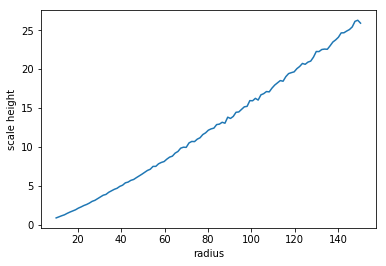

In [10]:
for df in radial_averages:
    plt.plot(df['R'], df['H'])
plt.xlabel('radius')
plt.ylabel('scale height')